#  EDA on E-Commerce
### Customer Purchase Dataset

Import analysis dependancies and libraries

In [158]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import missingno as msno
import autoreload
import os
import csv

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, f1_score, recall_score

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 1000)

sb.set()
sb.set_style('darkgrid')

fig = (8, 4)

Load & Manipulate Dataset

In [88]:
df = pd.read_csv("D:\Open Classroom\Datasets\Predict Customer Purchase Behavior Dataset\customer_purchase_data.csv")
df.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1


In [89]:
df.shape

(1500, 9)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1500 non-null   int64  
 1   Gender              1500 non-null   int64  
 2   AnnualIncome        1500 non-null   float64
 3   NumberOfPurchases   1500 non-null   int64  
 4   ProductCategory     1500 non-null   int64  
 5   TimeSpentOnWebsite  1500 non-null   float64
 6   LoyaltyProgram      1500 non-null   int64  
 7   DiscountsAvailed    1500 non-null   int64  
 8   PurchaseStatus      1500 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 105.6 KB


In [91]:
df.describe(include='all').round()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
count,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0
mean,44.0,1.0,84249.0,10.0,2.0,30.0,0.0,3.0,0.0
std,16.0,1.0,37629.0,6.0,1.0,17.0,0.0,2.0,0.0
min,18.0,0.0,20002.0,0.0,0.0,1.0,0.0,0.0,0.0
25%,31.0,0.0,53029.0,5.0,1.0,16.0,0.0,1.0,0.0
50%,45.0,1.0,83700.0,11.0,2.0,31.0,0.0,3.0,0.0
75%,57.0,1.0,117168.0,15.0,3.0,44.0,1.0,4.0,1.0
max,70.0,1.0,149785.0,20.0,4.0,60.0,1.0,5.0,1.0


In [92]:
df.isnull().sum()

Age                   0
Gender                0
AnnualIncome          0
NumberOfPurchases     0
ProductCategory       0
TimeSpentOnWebsite    0
LoyaltyProgram        0
DiscountsAvailed      0
PurchaseStatus        0
dtype: int64

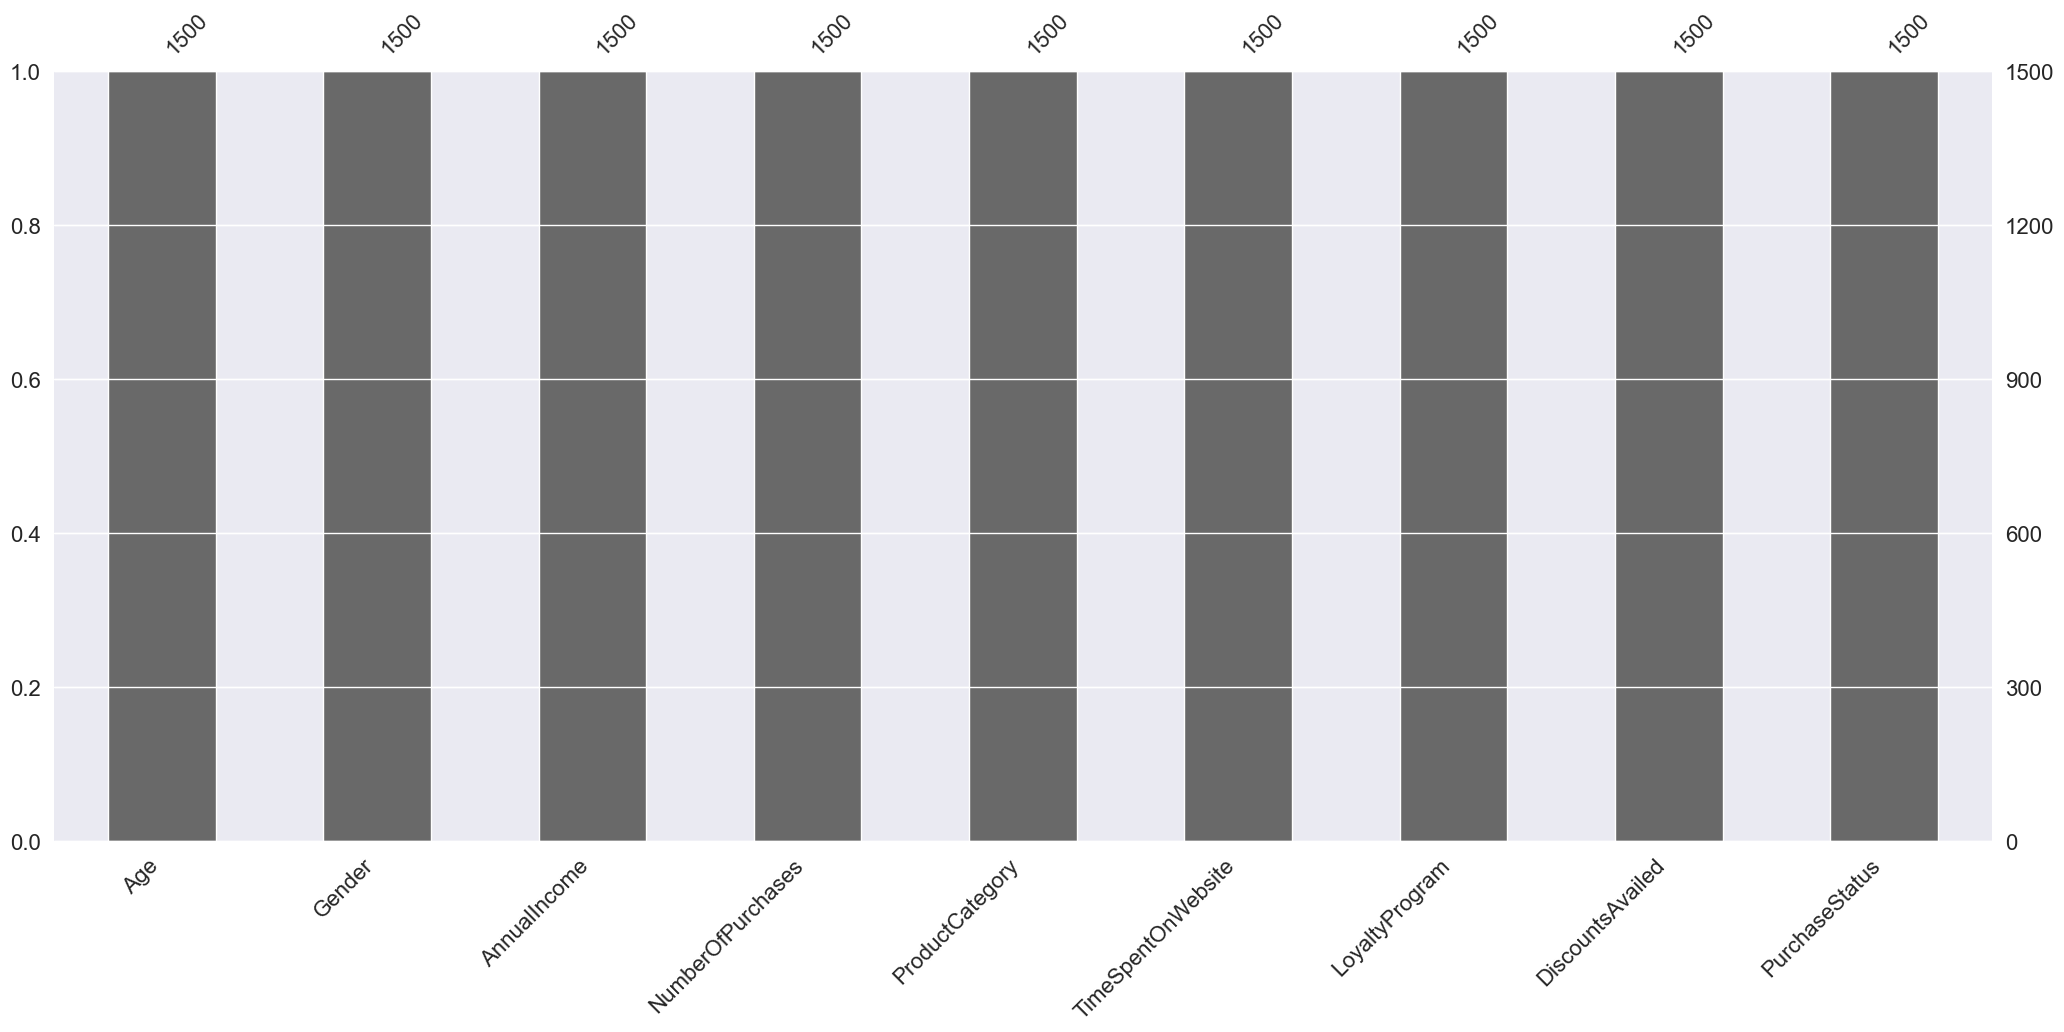

In [93]:
plt.figure(figsize=(4, 4))
msno.bar(df)
plt.show()

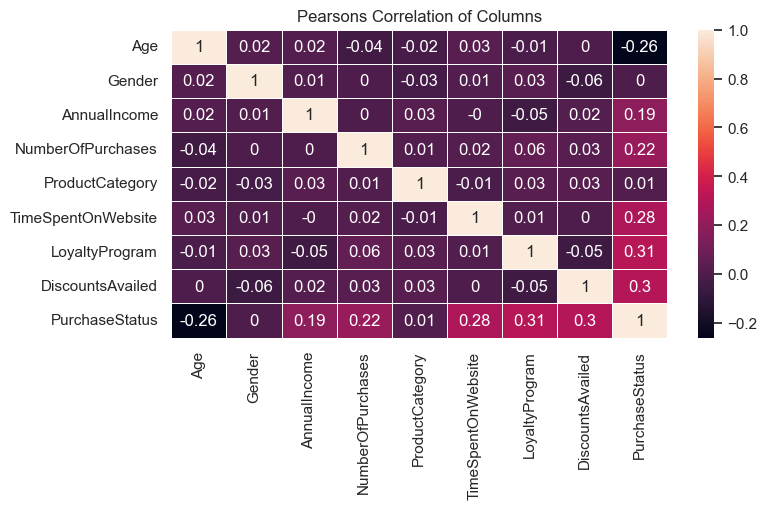

In [94]:
plt.figure(figsize=fig)
sb.heatmap(df.corr().round(2), annot=True, linewidths=0.7)
plt.title('Pearsons Correlation of Columns')
plt.show()

In [95]:
df.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1


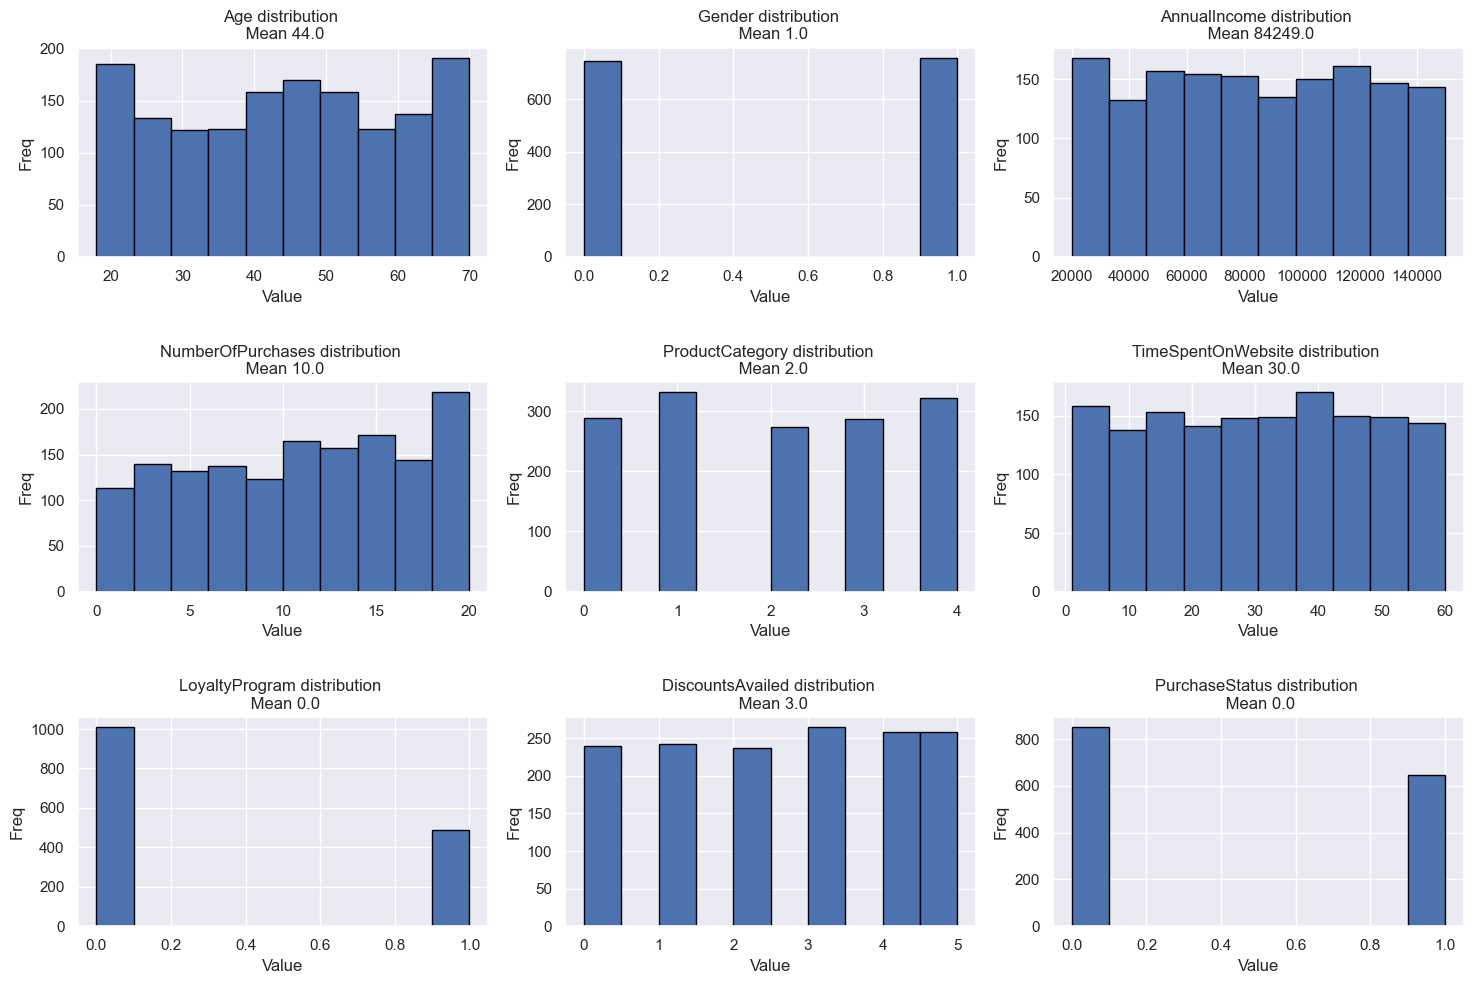

In [123]:

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10), squeeze=False)

axes = axes.flatten()

# cols = [i for i in df.columns]
cols = df.columns

# print(cols)

for i, idx in enumerate(cols):
    axes[i].hist(df[idx], edgecolor='black')
    axes[i].set_title(f'{idx} distribution \n Mean {df[idx].mean().round()}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Freq')


# Adjust layout
fig.tight_layout()

# Adjust the spacing between rows to avoid overlap
fig.subplots_adjust(hspace=0.6)



Linear Regression

In [124]:
df.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1


In [161]:
x = df.drop(columns=['PurchaseStatus'])
y = df['PurchaseStatus']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

print('x train: ', x_train.shape)
print('x test: ', x_test.shape)
print('y train: ', y_train.shape)
print('y test: ', y_test.shape)

x train:  (1200, 8)
x test:  (300, 8)
y train:  (1200,)
y test:  (300,)


In [162]:
lr = LinearRegression()

dtc = DecisionTreeClassifier()

In [163]:
dtc.fit(x_train, y_train)

y_pred = dtc.predict(x_test)

In [164]:
y_pred

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0], d

In [169]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89       173
           1       0.89      0.79      0.84       127

    accuracy                           0.87       300
   macro avg       0.87      0.86      0.86       300
weighted avg       0.87      0.87      0.87       300



Regression 

In [170]:
x = df.drop(columns='AnnualIncome')
y = df['AnnualIncome']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

print('x train: ', x_train.shape)
print('x test: ', x_test.shape)
print('y train: ', y_train.shape)
print('y test: ', y_test.shape)

x train:  (1200, 8)
x test:  (300, 8)
y train:  (1200,)
y test:  (300,)


In [171]:
dtr = DecisionTreeRegressor()

In [172]:
dtr.fit(x_train, y_train)

DecisionTreeRegressor()

In [173]:
y_pred = dtr.predict(x_test)

In [174]:
y_pred

array([113399.01315193, 111861.88308423, 104039.63641293, 120704.95905355,
       129552.54728087,  21152.22706475,  71367.90662436,  61286.28338395,
       111342.39050112, 124009.22593089,  91234.73356658,  66425.75070907,
       139699.65910024,  22485.09227587,  80939.83551039, 112003.77553478,
        23035.77252266,  74383.4023333 , 109475.65065143, 133531.97906191,
       147396.14281665, 103533.47593957, 118945.79981561,  43065.74003106,
        28775.3310689 , 112875.14132926,  95714.94556694,  99951.68584505,
        98493.40888342,  79539.44867046,  65922.68310527,  85052.14894233,
        99988.74325907,  58009.80435359,  77089.47616239,  20496.58994562,
        55997.58335912, 146881.7970263 , 147010.90407706, 113869.22196636,
       114116.49721059,  52288.91384807,  67880.23896589,  65922.68310527,
        29230.99638932,  50866.35088872,  96535.09787707,  74954.72279621,
        37397.68718996,  73640.83931032,  27417.11374966, 119959.96167399,
       107292.28932674,  

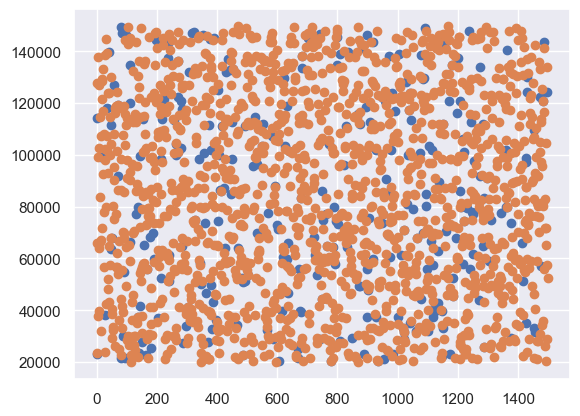

In [185]:
plt.scatter(y_test.index, y_pred)
plt.scatter(df.index, df['AnnualIncome'])

In [182]:
print(precision_score(y, y_pred))

ValueError: Found input variables with inconsistent numbers of samples: [1500, 300]